In [130]:
import pandas as pd
import numpy as np


#df = pd.read_csv("gnb_normalize_dataset_fix.csv")
df = pd.read_csv("dataset_iklim_new.csv", delimiter=";", thousands=".", decimal=",", parse_dates=["Tanggal"], index_col="Tanggal")

df

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE
...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19.8,29.0,23.7,78.0,0.0,9.0,3.0,170.0,2.0,S
2022-09-05,19.4,29.3,23.8,78.0,16.4,5.7,5.0,90.0,2.0,C
2022-09-06,19.0,29.4,23.6,81.0,0.0,2.6,4.0,140.0,1.0,C


- 8888: data tidak terukur
- 9999: Tidak Ada Data (tidak dilakukan pengukuran)
- Tn: Temperatur minimum (°C)
- Tx: Temperatur maksimum (°C)
- **Tavg: Temperatur rata-rata (°C)**
- **RH_avg: Kelembapan rata-rata (%)**
- **RR: Curah hujan (mm)**
- **ss: Lamanya penyinaran matahari (jam)**
- ff_x: Kecepatan angin maksimum (m/s)
- ddd_x: Arah angin saat kecepatan maksimum (°)
- ff_avg: Kecepatan angin rata-rata (m/s)
- ddd_car: Arah angin terbanyak (°)

Dropping unused data - null data

In [131]:
df = df.dropna()
df

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE
...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19.8,29.0,23.7,78.0,0.0,9.0,3.0,170.0,2.0,S
2022-09-05,19.4,29.3,23.8,78.0,16.4,5.7,5.0,90.0,2.0,C
2022-09-06,19.0,29.4,23.6,81.0,0.0,2.6,4.0,140.0,1.0,C


then, drop the rows with value 8888 (data tidak terukur a.k.a not measured) and 9999 (Tidak Ada Data (tidak dilakukan pengukuran) a.k.a no data), because we don't need it. 

Based on observation above, the value with 8888 and 9999 is only in the columns with column called rr (curah hujan)

In [132]:
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,20.246800,28.978804,24.151312,79.378804,360.932949,5.862434,4.488982,127.481637,1.802728
std,1.285174,1.152660,0.929625,6.472976,1738.693294,2.752462,1.294840,63.863332,0.746781
min,14.200000,24.500000,20.100000,38.000000,0.000000,0.000000,2.000000,10.000000,0.000000
25%,19.800000,28.400000,23.600000,76.000000,0.000000,3.900000,4.000000,70.000000,1.000000
50%,20.400000,29.000000,24.200000,80.000000,0.500000,6.200000,4.000000,130.000000,2.000000
75%,21.100000,29.800000,24.800000,84.000000,8.700000,8.100000,5.000000,170.000000,2.000000
max,23.400000,32.000000,26.900000,94.000000,8888.000000,11.000000,10.000000,360.000000,5.000000


In [133]:
# delete row with 8888 value
df.drop(df[df['RR'] == 8888].index, inplace=True)
df.drop(df[df['RR'] == 9999].index, inplace=True)
df

C:\Users\akuradz\AppData\Local\Temp\ipykernel_7456\816279575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['RR'] == 8888].index, inplace=True)
C:\Users\akuradz\AppData\Local\Temp\ipykernel_7456\816279575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['RR'] == 9999].index, inplace=True)


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE
...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19.8,29.0,23.7,78.0,0.0,9.0,3.0,170.0,2.0,S
2022-09-05,19.4,29.3,23.8,78.0,16.4,5.7,5.0,90.0,2.0,C
2022-09-06,19.0,29.4,23.6,81.0,0.0,2.6,4.0,140.0,1.0,C


In [134]:
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,20.224044,28.974973,24.151585,79.291803,6.803388,5.878361,4.486339,126.754098,1.806557
std,1.294007,1.154696,0.936288,6.523404,14.285305,2.759042,1.295751,63.611750,0.746077
min,14.200000,24.500000,20.100000,38.000000,0.000000,0.000000,2.000000,10.000000,0.000000
25%,19.700000,28.300000,23.600000,75.000000,0.000000,3.900000,4.000000,70.000000,1.000000
50%,20.400000,29.000000,24.200000,80.000000,0.200000,6.200000,4.000000,130.000000,2.000000
75%,21.050000,29.800000,24.800000,84.000000,6.450000,8.100000,5.000000,170.000000,2.000000
max,23.400000,32.000000,26.900000,94.000000,145.000000,11.000000,10.000000,360.000000,5.000000


Limit of Extreme Climate on Stasiun Klimatologi Jawa Timur

- rr/curah hujan = 145mm (28/02/2021)
- Tx/temperatur maksimum = 32°C (12/04/2020)
- Tn/temperatur minimum = 14.2°C (30/07/2020)
- Tavg/temperatur rata-rata = 26.9°C (12/11/2020)
- rh/kelembapan rata-rata = 38% (26/07/2021)
- wx/kecepatan angin maksimum = 2 knot (05/04/2020)    

In [135]:
# limit of extreme value
labels_of_y = [0, 1]

rr_treshold = 145
tx_treshold = 32
tn_treshold = 14.2
tAvg_treshold = 26.9
rh_treshold = 38
wx_treshold = 2

df_dummy = df.copy()

df_discreted = pd.DataFrame()
df_discreted['rr'] = np.where(df_dummy['RR'] >= rr_treshold, 1, 0)
df_discreted['tx'] = np.where(df_dummy['Tx'] >= tx_treshold, 1, 0)
df_discreted['tn'] = np.where(df_dummy['Tn'] >= tn_treshold, 1, 0)
df_discreted['tAvg'] = np.where(df_dummy['Tavg'] >= tAvg_treshold, 1, 0)
df_discreted['rh'] = np.where(df_dummy['RH_avg'] >= rh_treshold, 1, 0)
df_discreted['wx'] = np.where(df_dummy['ff_avg'] >= wx_treshold, 1, 0)
df_discreted['probability'] = 0
df_discreted['extreme'] = 'UNKNOWN'

df_discreted

,rr,tx,tn,tAvg,rh,wx,probability,extreme
0,0,0,1,0,1,0,0,UNKNOWN
1,0,0,1,0,1,0,0,UNKNOWN
2,0,0,1,0,1,0,0,UNKNOWN
3,0,0,1,0,1,0,0,UNKNOWN
4,0,0,1,0,1,1,0,UNKNOWN
...,...,...,...,...,...,...,...,...
910,0,0,1,0,1,1,0,UNKNOWN
911,0,0,1,0,1,1,0,UNKNOWN
912,0,0,1,0,1,0,0,UNKNOWN
913,0,0,1,0,1,1,0,UNKNOWN


In [136]:

# iterate each row in dataframe
for index, row in df_discreted.iterrows():
    # count value with TINGGI value
    tinggi = 0

    # loop each column in dataframe
    for col in range(6):
        # check if value is TINGGI
        if row[col] == 1:
            tinggi += 1
  
    # calculate probability
    prob = tinggi / 6
    # set row column presentase with probability value
    
    df_discreted.loc[index, 'probability'] = prob

    df_discreted.loc[index, 'extreme'] = 1 if prob >= 0.5 else 0

df_discreted

,rr,tx,tn,tAvg,rh,wx,probability,extreme
0,0,0,1,0,1,0,0.333333,0
1,0,0,1,0,1,0,0.333333,0
2,0,0,1,0,1,0,0.333333,0
3,0,0,1,0,1,0,0.333333,0
4,0,0,1,0,1,1,0.500000,1
...,...,...,...,...,...,...,...,...
910,0,0,1,0,1,1,0.500000,1
911,0,0,1,0,1,1,0.500000,1
912,0,0,1,0,1,0,0.333333,0
913,0,0,1,0,1,1,0.500000,1


In [137]:
# copy df_discreted['extreme'] to df on right side as new column as number
df['extreme'] = df_discreted['extreme'].values
df

C:\Users\akuradz\AppData\Local\Temp\ipykernel_7456\1973297866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extreme'] = df_discreted['extreme'].values


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,extreme
Tanggal,,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C,0
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C,0
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C,0
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C,0
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19.8,29.0,23.7,78.0,0.0,9.0,3.0,170.0,2.0,S,1
2022-09-05,19.4,29.3,23.8,78.0,16.4,5.7,5.0,90.0,2.0,C,1
2022-09-06,19.0,29.4,23.6,81.0,0.0,2.6,4.0,140.0,1.0,C,0


In [138]:
# labelling using sklearn on column ff_avg
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ddd_car'] = le.fit_transform(df['ddd_car'])
df

C:\Users\akuradz\AppData\Local\Temp\ipykernel_7456\1622747156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ddd_car'] = le.fit_transform(df['ddd_car'])


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,extreme
Tanggal,,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,0,0
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,0,0
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,0,0
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,0,0
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19.8,29.0,23.7,78.0,0.0,9.0,3.0,170.0,2.0,5,1
2022-09-05,19.4,29.3,23.8,78.0,16.4,5.7,5.0,90.0,2.0,0,1
2022-09-06,19.0,29.4,23.6,81.0,0.0,2.6,4.0,140.0,1.0,0,0


## Split to X and y

In [139]:
X = df.drop(['RR'], axis=1)
y = df['RR']

y

Tanggal
2020-01-01    43.3
2020-01-02     2.6
2020-01-03     1.9
2020-01-04     2.1
2020-01-05     1.0
              ... 
2022-09-04     0.0
2022-09-05    16.4
2022-09-06     0.0
2022-09-07     0.0
2022-09-08    11.4
Name: RR, Length: 915, dtype: float64

## Scaled it first

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.13605221, -0.67151577, -0.48257747, ..., -1.08165573,
        -0.83063321, -1.3868391 ],
       [ 0.754625  , -0.15161426, -0.37571436, ..., -1.08165573,
        -0.83063321, -1.3868391 ],
       [ 0.9092682 , -0.15161426, -0.16198813, ..., -1.08165573,
        -0.83063321, -1.3868391 ],
       ...,
       [-0.94645017,  0.36828724, -0.58944059, ..., -1.08165573,
        -0.83063321, -1.3868391 ],
       [-0.94645017, -0.15161426, -0.05512502, ...,  0.2594215 ,
         1.16210247,  0.72106418],
       [-0.71448538,  0.88818875, -0.6963037 , ...,  0.2594215 ,
        -0.83063321,  0.72106418]])

## Test without PCA

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# y_test

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))

reg.score(X_test, y_test)
    

Coefficients: 
 [-1.9797923  -0.62753994  2.02826746  3.78257969 -1.67402515 -0.52061332
  0.39756294  0.07216872 -0.52048397 -0.75300918]
Mean squared error: 246.42
Coefficient of determination: 0.07


0.07382482258759993

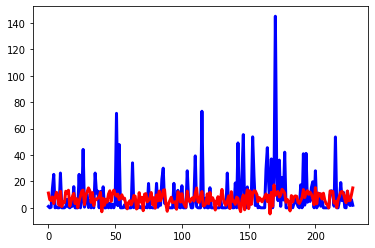

In [143]:
# Plot outputs
import matplotlib.pyplot as plt

# plot y_test as line and disable index
plt.plot(y_test.values, color='blue', linewidth=3)
# plot y_pred as line and disable index
plt.plot(y_pred, color='red', linewidth=3)



In [144]:
# if value < 0, set value to 0 in y_pred
for i in range(len(y_pred)):
    if y_pred[i] < 0:
        y_pred[i] = 0



## Test with PCA

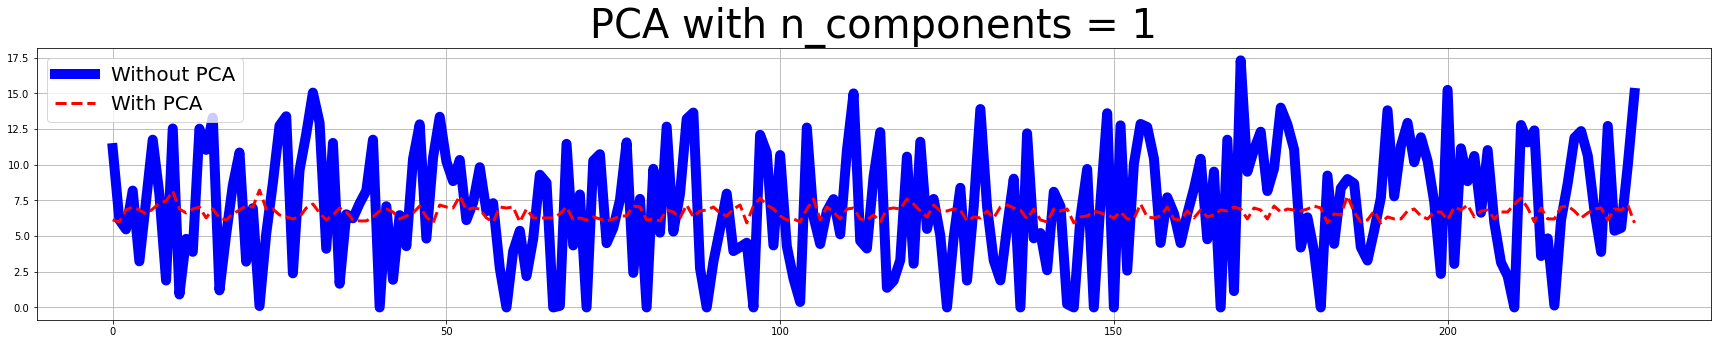

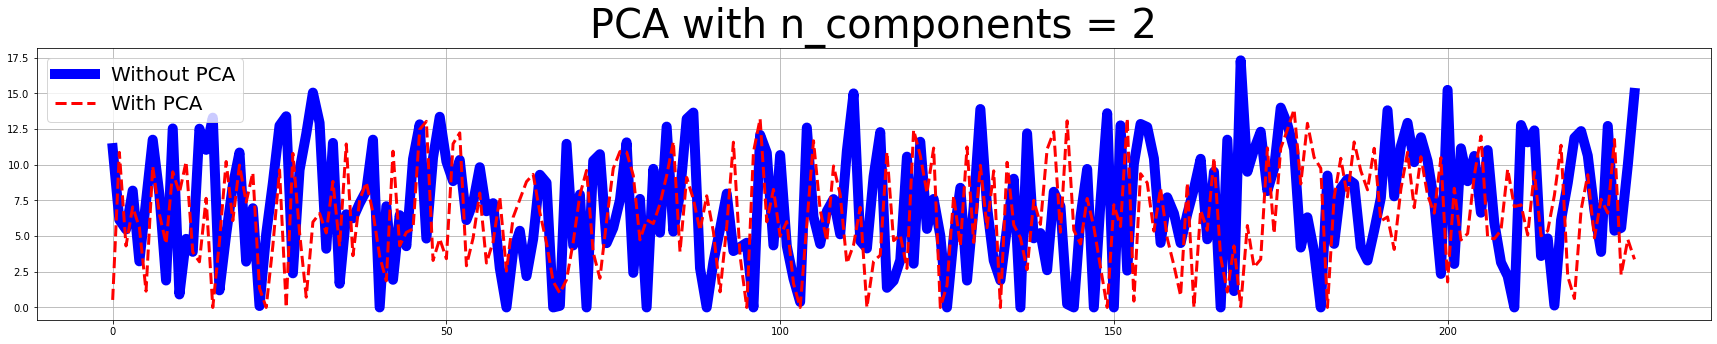

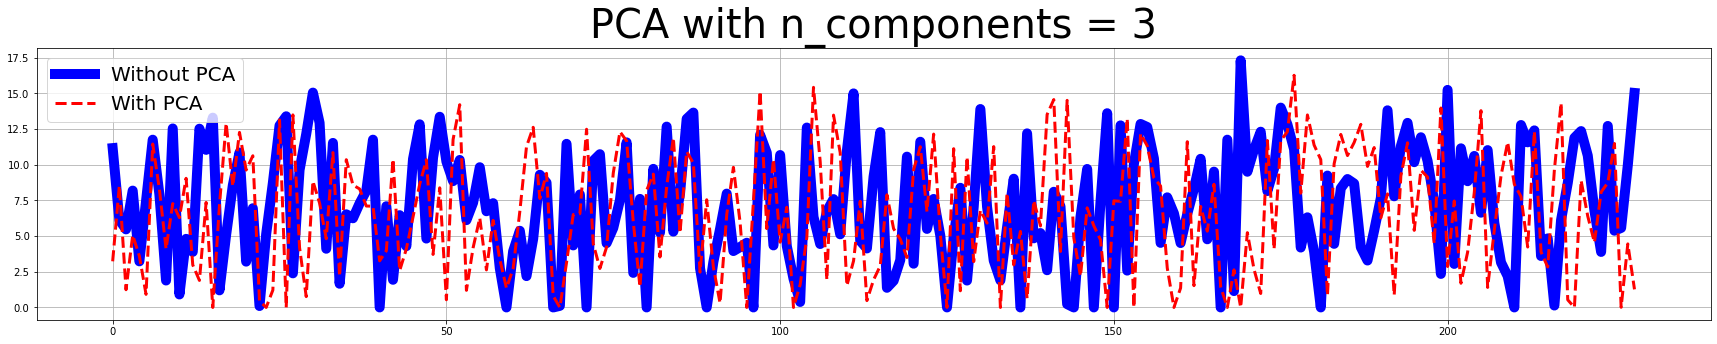

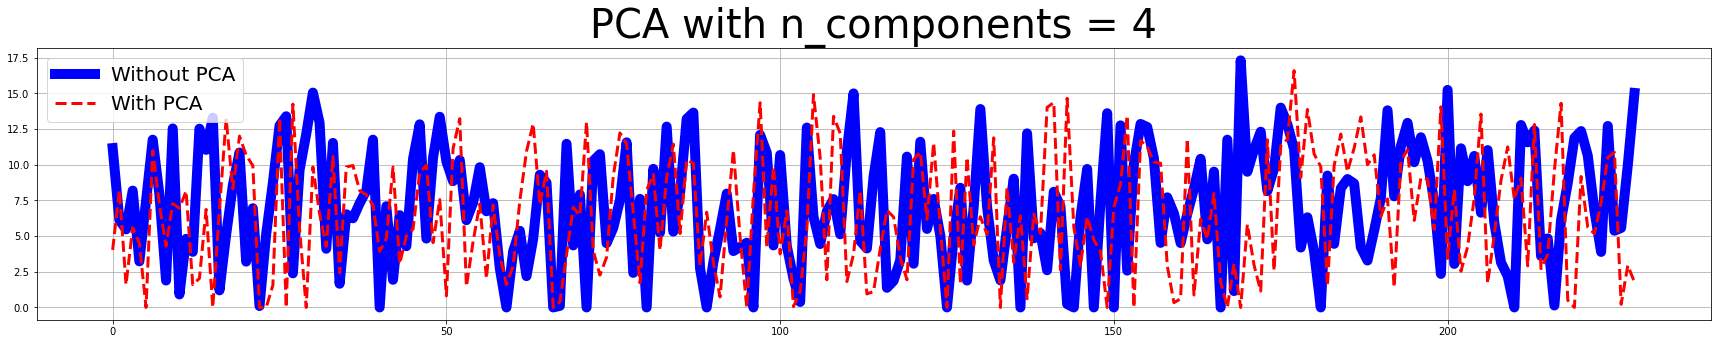

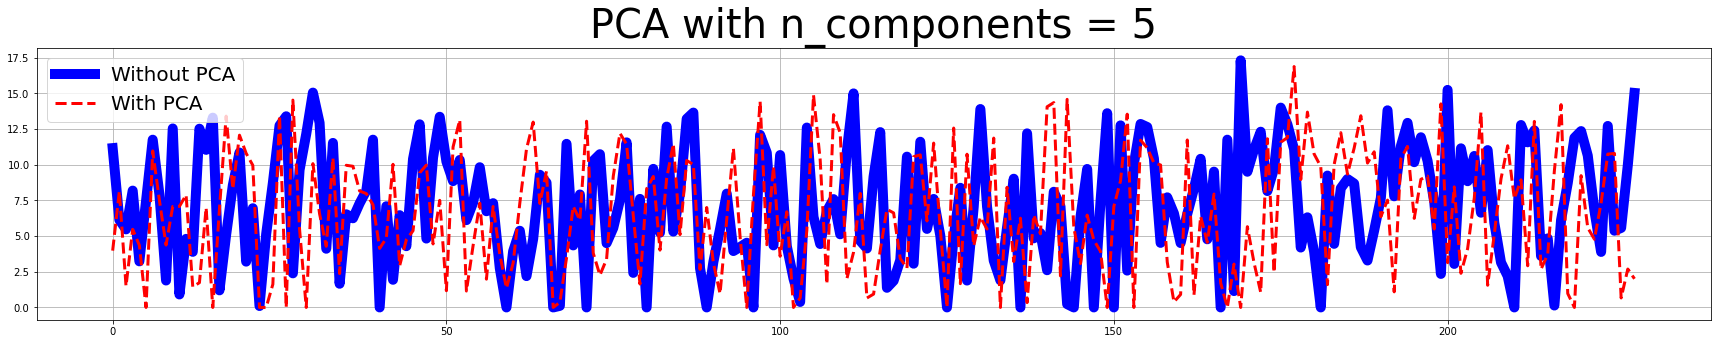

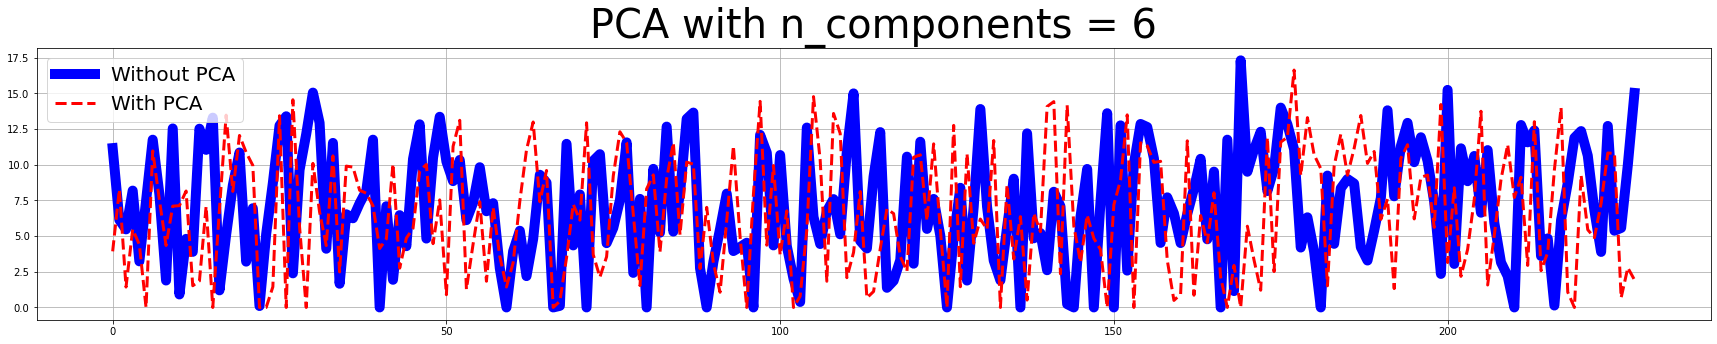

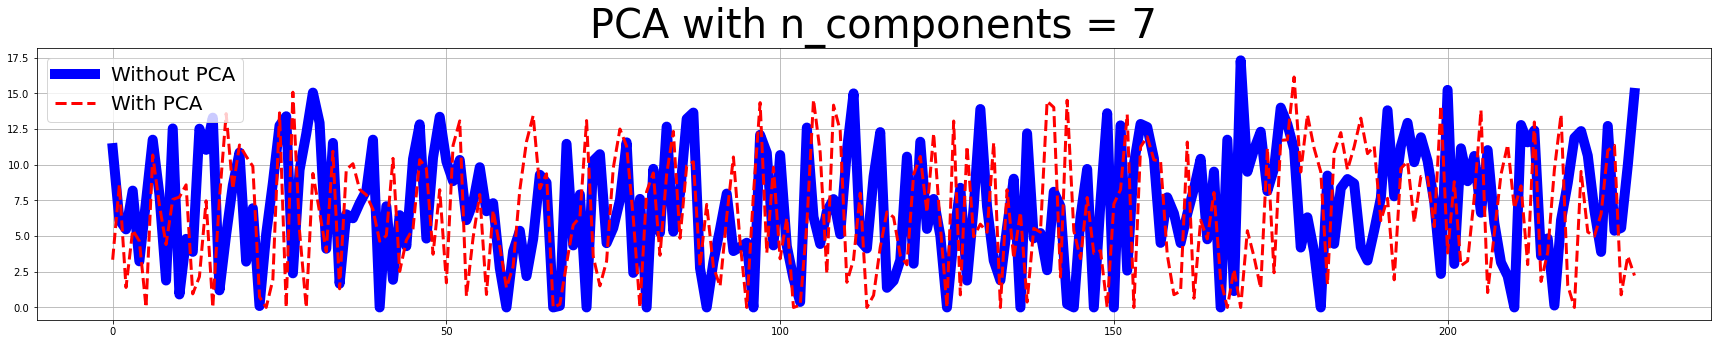

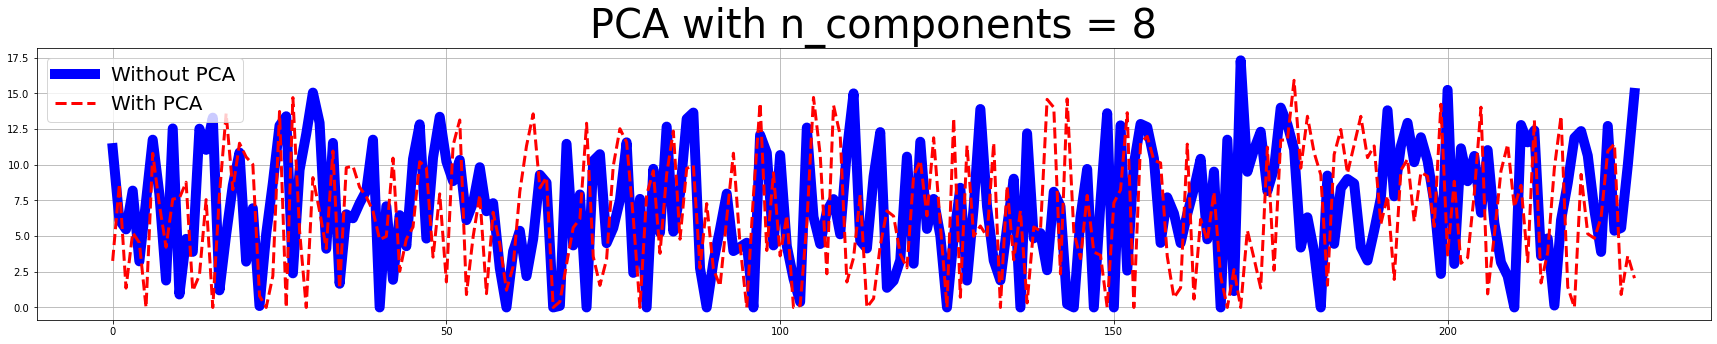

In [145]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


for i in range(1, 9):
    pca = PCA(n_components=i)
    pca.fit_transform(X_scaled)
    X_pca = pca.fit_transform(X)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.25, random_state=30)
    model = LinearRegression()
    model.fit(X_train_pca, y_train_pca)
    model.score(X_test_pca, y_test_pca)
    y_pred_pca = model.predict(X_test_pca)

    for p in range(len(y_pred_pca)):
        if y_pred_pca[p] < 0:
            y_pred_pca[p] = 0

    # set size of figure
    plt.figure(figsize=(30, 5))
    plt.grid()
    # plot y_test as line and disable index
    plt.plot(y_pred, color='blue', linewidth=10)
    # plot y_pred as line and disable index
    plt.plot(y_pred_pca, color='red', linewidth=3, linestyle='dashed')
    # plt.plot(y_test.values, color='green', linewidth=3, linestyle='dashed')
    plt.legend(['Without PCA', 'With PCA'], loc='upper left', fontsize=20)
    plt.title('PCA with n_components = ' + str(i), fontsize=40)
    plt.show()

    
    
    

## Test with Manual PCA

In [146]:
# Kaiser Meyer Olkin (KMO) Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(X_scaled)
kmo_model



0.6440356661832535

In [147]:
# Bartlett’s Test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X_scaled)

chi_square_value, p_value





(4442.151611128994, 0.0)

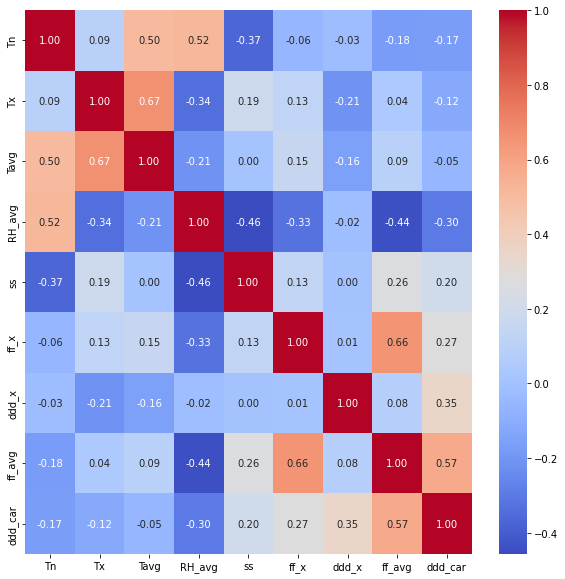

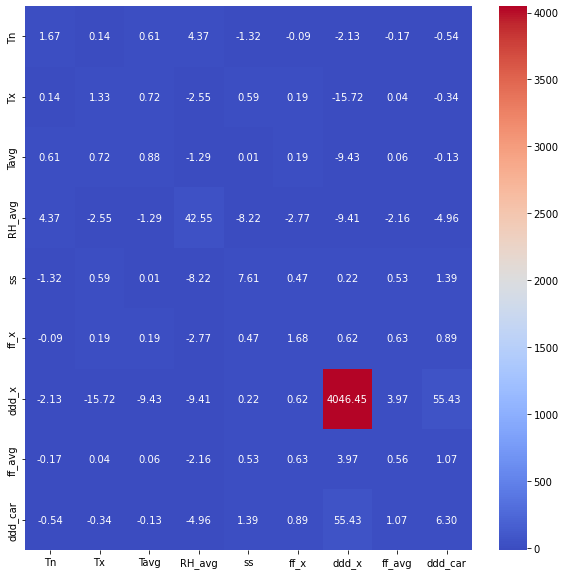

In [148]:
# Anti-image correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Anti-image covariance matrix
cov = X.cov()
plt.figure(figsize=(10, 10))
sns.heatmap(cov, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [149]:
# Check Eigenvalues
ev, v = np.linalg.eig(cov)
ev



array([4.04732568e+03, 4.59845289e+01, 5.93024328e+00, 5.07902006e+00,
       2.23392567e+00, 1.43508251e+00, 7.08736930e-01, 1.59373014e-01,
       1.87854253e-01])

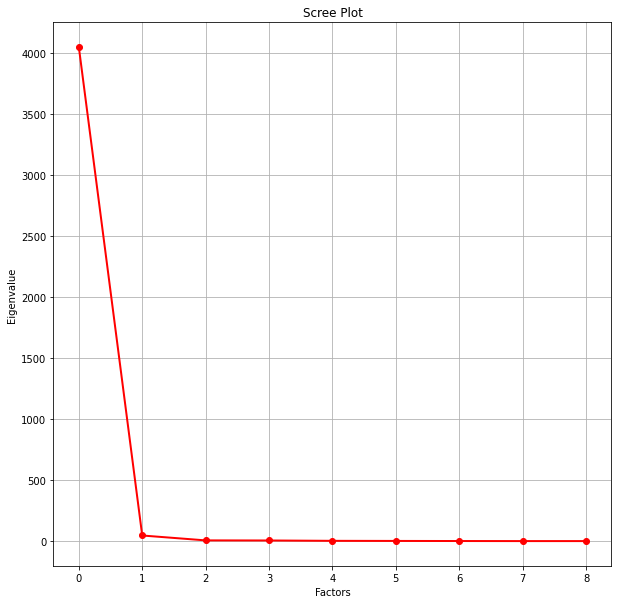

In [150]:
# Create scree plot
plt.figure(figsize=(10, 10))
plt.plot(ev, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()